# Paralleling Neural Network with PyTorch

- a simpe network with synthetic dataset
- build input pipeline, model, loss function and optimizer

## NN with Synthetic Data

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
# 1. Create synthetic data
X = torch.randn(100, 10)  # 100 samples, 10 features each
y = torch.randint(0, 2, (100,))  # 100 labels (binary classification: 0 or 1)


In [3]:

# 2. Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 32)  # input layer (10) -> hidden layer (32)
        self.fc2 = nn.Linear(32, 2)   # hidden layer (32) -> output layer (2 classes)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x) # define activation function
        x = self.fc2(x)
        return x

model = SimpleNN()


In [4]:
# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [5]:
# 4. Training loop
for epoch in range(20):  # train for 20 epochs
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/20], Loss: {loss.item():.4f}')

Epoch [5/20], Loss: 0.6204
Epoch [10/20], Loss: 0.5298
Epoch [15/20], Loss: 0.4642
Epoch [20/20], Loss: 0.4076


## NN with large dataset

📚 FashionMNIST dataset size:

Training set: 60,000 images

Test set: 10,000 images

Each image is:

Size 28×28 pixels (grayscale, 1 channel)

Belongs to 1 of 10 classes

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [8]:
# 1. Prepare dataset and dataloader
transform = transforms.ToTensor()

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.56MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 313kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


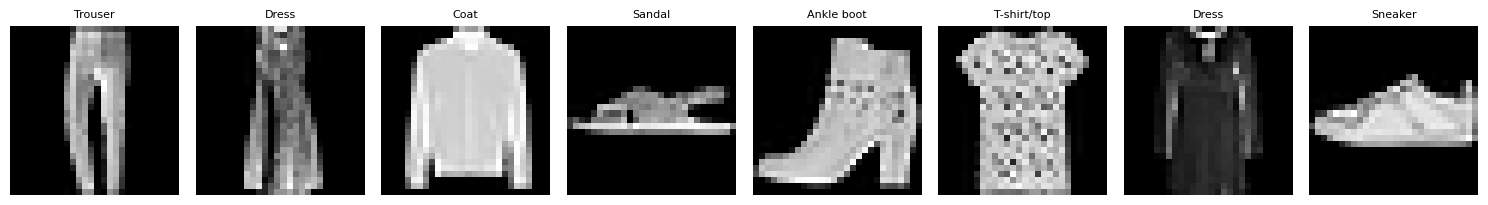

In [9]:
# Visualize the first 8 images from FashionMNIST
import matplotlib.pyplot as plt

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get one batch
images, labels = next(iter(train_loader))

# Plot the first 8 images
fig, axes = plt.subplots(1, 8, figsize=(15, 2))
for idx in range(8):
    img = images[idx].squeeze()  # remove channel dimension (1,28,28) → (28,28)
    label = labels[idx].item()
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(classes[label], fontsize=8)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


In [10]:
# 2. Define a simple neural network
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = FashionNN()


In [11]:
# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [12]:
# 4. Training loop
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()  # add batch loss to total

    avg_loss = running_loss / len(train_loader)  # average loss per batch
    print(f'Epoch [{epoch+1}/5], Average Loss: {avg_loss:.4f}')


Epoch [1/5], Average Loss: 0.5592
Epoch [2/5], Average Loss: 0.3965
Epoch [3/5], Average Loss: 0.3544
Epoch [4/5], Average Loss: 0.3308
Epoch [5/5], Average Loss: 0.3125


In [13]:
# 5. Save the model
torch.save(model.state_dict(), 'fashion_mnist_model.pth')
print("Model saved!")


Model saved!


In [14]:
# 6. Load the model
model2 = FashionNN()
model2.load_state_dict(torch.load('fashion_mnist_model.pth'))
model2.eval()
print("Model reloaded and ready!")

Model reloaded and ready!


## Your Work

MNIST is the simplest dataset in torchvision.datasets. Please replace FashionMNIST with MNIST for above codes and play around it with your parameters. Submit the notebook in PDF to BS by 5/11 11:59 pm.

100%|██████████| 9.91M/9.91M [00:00<00:00, 27.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 2.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 18.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]


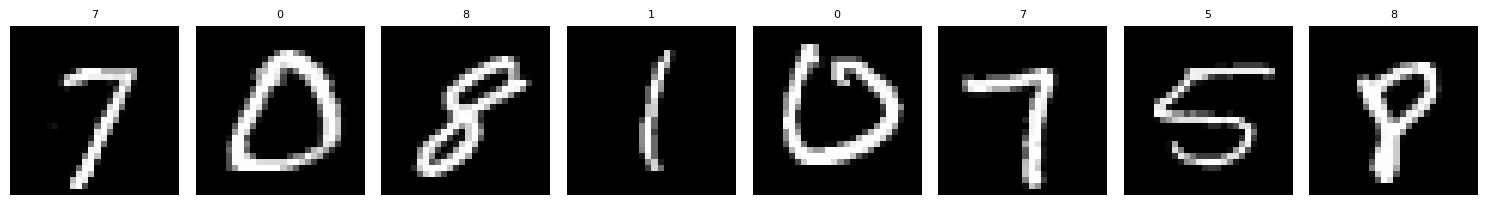

In [15]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Visualize the first 8 images from MNIST
classes = [str(i) for i in range(10)]
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 8, figsize=(15, 2))
for idx in range(8):
    img = images[idx].squeeze()
    label = labels[idx].item()
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(classes[label], fontsize=8)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
class MNISTNN(nn.Module): #define a simple neural network
    def __init__(self):
        super(MNISTNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MNISTNN() #nn init

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/5], Average Loss: {avg_loss:.4f}')

Epoch [1/5], Average Loss: 0.3387
Epoch [2/5], Average Loss: 0.1400
Epoch [3/5], Average Loss: 0.0969
Epoch [4/5], Average Loss: 0.0724
Epoch [5/5], Average Loss: 0.0566


In [18]:
torch.save(model.state_dict(), 'mnist_model.pth')
print("MNIST Model saved!")


model2 = MNISTNN()
model2.load_state_dict(torch.load('mnist_model.pth'))
model2.eval()
print("MNIST Model reloaded and ready!")

MNIST Model saved!
MNIST Model reloaded and ready!
